In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data_final.csv")
df.head()

,material_id,pretty_formula,elements,count,density,elasticity.poisson_ratio,elasticity.K_VRH,melting_point,thermal_conductivity,radius,...,formation_energy_per_atom,C11,C22,C33,C12,C13,C23,C44,C55,C66
0,mp-1007691,HfPt,"['Hf', 'Pt']","[1, 1]",16.386167,0.36,179,2273.700,47.500000,1.9250,...,-1.146823,285,296,207,154,170,110,22,102,85
1,mp-1007923,CrNi3,"['Cr', 'Ni']","[1, 3]",8.618942,0.29,222,1841.000,91.750000,1.5325,...,-0.013727,298,298,334,178,178,178,146,146,142
2,mp-1008555,AlCu3,"['Al', 'Cu']","[1, 3]",7.301686,0.50,129,1251.695,358.750000,1.3825,...,-0.181494,111,111,111,137,137,137,82,82,82
3,mp-1014219,HfZn,"['Hf', 'Zn']","[1, 1]",11.233434,0.31,105,1599.340,71.500000,1.7500,...,-0.199346,131,131,131,92,92,92,78,78,78
4,mp-1014231,Hf2Zn,"['Hf', 'Zn']","[2, 1]",11.755995,0.27,109,1901.560,55.333333,1.8600,...,-0.177786,177,177,144,57,91,91,100,100,44


In [3]:
# data filtering

In [4]:
df.drop(df[(df['elasticity.poisson_ratio']<0) | (df['elasticity.poisson_ratio']>1)].index,inplace=True)

In [5]:
df.drop(df[(df['C11']<0) | (df['C22']<0) | (df['C33']<0) | (df['C12']<0) | (df['C13']<0) | (df['C23']<0) | (df['C44']<0) | (df['C55']<0) | (df['C66']<0)].index,inplace=True)

In [6]:
df

,material_id,pretty_formula,elements,count,density,elasticity.poisson_ratio,elasticity.K_VRH,melting_point,thermal_conductivity,radius,...,formation_energy_per_atom,C11,C22,C33,C12,C13,C23,C44,C55,C66
0,mp-1007691,HfPt,"['Hf', 'Pt']","[1, 1]",16.386167,0.36,179,2273.700000,47.500000,1.925000,...,-1.146823,285,296,207,154,170,110,22,102,85
1,mp-1007923,CrNi3,"['Cr', 'Ni']","[1, 3]",8.618942,0.29,222,1841.000000,91.750000,1.532500,...,-0.013727,298,298,334,178,178,178,146,146,142
2,mp-1008555,AlCu3,"['Al', 'Cu']","[1, 3]",7.301686,0.50,129,1251.695000,358.750000,1.382500,...,-0.181494,111,111,111,137,137,137,82,82,82
3,mp-1014219,HfZn,"['Hf', 'Zn']","[1, 1]",11.233434,0.31,105,1599.340000,71.500000,1.750000,...,-0.199346,131,131,131,92,92,92,78,78,78
4,mp-1014231,Hf2Zn,"['Hf', 'Zn']","[2, 1]",11.755995,0.27,109,1901.560000,55.333333,1.860000,...,-0.177786,177,177,144,57,91,91,100,100,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,mp-9827,RbHg2,"['Rb', 'Hg']","[1, 2]",7.082796,0.28,11,260.366667,24.866667,2.023333,...,-0.269594,18,14,18,8,6,9,10,5,5
899,mp-982873,Na3Tl,"['Na', 'Tl']","[3, 1]",3.700157,0.09,18,422.402500,116.500000,1.815000,...,-0.086066,44,44,44,5,5,5,21,21,21
901,mp-999133,TaPd,"['Ta', 'Pd']","[1, 1]",14.241042,0.34,204,2559.025000,64.500000,1.845000,...,-0.364520,256,256,269,205,162,162,112,112,108
902,mp-999376,NbPt,"['Nb', 'Pt']","[1, 1]",14.396480,0.28,223,2395.700000,63.000000,1.875000,...,-0.612259,397,372,446,135,132,132,103,108,99


In [7]:
df['spacegroup.crystal_system'].value_counts()

cubic           318
tetragonal      197
hexagonal       175
orthorhombic    134
trigonal         36
monoclinic       16
triclinic         1
Name: spacegroup.crystal_system, dtype: int64

<AxesSubplot:xlabel='spacegroup.crystal_system', ylabel='count'>

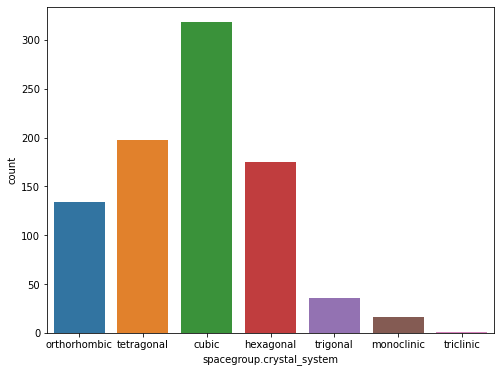

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='spacegroup.crystal_system',data=df)
#plt.savefig('heat3.jpg',bbox_inches='tight')

In [9]:
#df[(df['spacegroup.crystal_system']=='triclinic') | (df['spacegroup.crystal_system']=='monoclinic') | (df['spacegroup.crystal_system']=='trigonal')]

In [10]:
df.drop(df[(df['spacegroup.crystal_system']=='triclinic') | (df['spacegroup.crystal_system']=='monoclinic') | (df['spacegroup.crystal_system']=='trigonal')].index,inplace=True)

In [11]:
len(df)

824

In [12]:
df['spacegroup.point_group'].value_counts()

m-3m     296
4/mmm    187
6/mmm    157
mmm      127
-6m2      10
-43m       8
4/m        8
23         7
mm2        7
m-3        5
6mm        5
622        3
432        2
4mm        1
-42m       1
Name: spacegroup.point_group, dtype: int64

<AxesSubplot:xlabel='spacegroup.point_group', ylabel='count'>

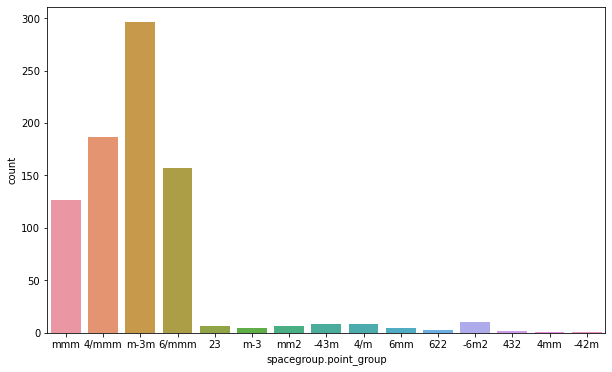

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='spacegroup.point_group',data=df)
#plt.savefig('heat4.jpg',bbox_inches='tight')

In [14]:
df.drop(df[(df['spacegroup.point_group']=='-42m') | (df['spacegroup.point_group']=='3') | (df['spacegroup.point_group']=='4mm') | (df['spacegroup.point_group']=='m') | (df['spacegroup.point_group']=='-1') | (df['spacegroup.point_group']=='32') | (df['spacegroup.point_group']=='432') | (df['spacegroup.point_group']=='622') | (df['spacegroup.point_group']=='m-3')].index,inplace=True)

In [15]:
df.drop(df[(df['spacegroup.point_group']=='-3') | (df['spacegroup.point_group']=='6mm') | (df['spacegroup.point_group']=='mm2') | (df['spacegroup.point_group']=='23') | (df['spacegroup.point_group']=='4/m') | (df['spacegroup.point_group']=='-43m') | (df['spacegroup.point_group']=='-6m2') | (df['spacegroup.point_group']=='2/m') | (df['spacegroup.point_group']=='-3m')].index,inplace=True)

In [16]:
len(df)

767

In [17]:
df['spacegroup.point_group'].value_counts()

m-3m     296
4/mmm    187
6/mmm    157
mmm      127
Name: spacegroup.point_group, dtype: int64

In [18]:
df['spacegroup.crystal_system'].value_counts()

cubic           296
tetragonal      187
hexagonal       157
orthorhombic    127
Name: spacegroup.crystal_system, dtype: int64

In [19]:
crystal_system=[]
for ele in df['spacegroup.crystal_system']:
    if ele=='cubic':
        crystal_system.append([1,0,0,0])
    elif ele=='tetragonal':
        crystal_system.append([0,1,0,0])
    elif ele=='hexagonal':
        crystal_system.append([0,0,1,0])
    elif ele=='orthorhombic':
        crystal_system.append([0,0,0,1])
    

In [20]:
len(crystal_system)

767

In [21]:
df.insert(5,column='crystal_system',value=crystal_system)

In [22]:
df

,material_id,pretty_formula,elements,count,density,crystal_system,elasticity.poisson_ratio,elasticity.K_VRH,melting_point,thermal_conductivity,...,formation_energy_per_atom,C11,C22,C33,C12,C13,C23,C44,C55,C66
0,mp-1007691,HfPt,"['Hf', 'Pt']","[1, 1]",16.386167,"[0, 0, 0, 1]",0.36,179,2273.700000,47.500000,...,-1.146823,285,296,207,154,170,110,22,102,85
1,mp-1007923,CrNi3,"['Cr', 'Ni']","[1, 3]",8.618942,"[0, 1, 0, 0]",0.29,222,1841.000000,91.750000,...,-0.013727,298,298,334,178,178,178,146,146,142
2,mp-1008555,AlCu3,"['Al', 'Cu']","[1, 3]",7.301686,"[1, 0, 0, 0]",0.50,129,1251.695000,358.750000,...,-0.181494,111,111,111,137,137,137,82,82,82
3,mp-1014219,HfZn,"['Hf', 'Zn']","[1, 1]",11.233434,"[1, 0, 0, 0]",0.31,105,1599.340000,71.500000,...,-0.199346,131,131,131,92,92,92,78,78,78
4,mp-1014231,Hf2Zn,"['Hf', 'Zn']","[2, 1]",11.755995,"[0, 1, 0, 0]",0.27,109,1901.560000,55.333333,...,-0.177786,177,177,144,57,91,91,100,100,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,mp-9827,RbHg2,"['Rb', 'Hg']","[1, 2]",7.082796,"[0, 0, 0, 1]",0.28,11,260.366667,24.866667,...,-0.269594,18,14,18,8,6,9,10,5,5
899,mp-982873,Na3Tl,"['Na', 'Tl']","[3, 1]",3.700157,"[1, 0, 0, 0]",0.09,18,422.402500,116.500000,...,-0.086066,44,44,44,5,5,5,21,21,21
901,mp-999133,TaPd,"['Ta', 'Pd']","[1, 1]",14.241042,"[0, 1, 0, 0]",0.34,204,2559.025000,64.500000,...,-0.364520,256,256,269,205,162,162,112,112,108
902,mp-999376,NbPt,"['Nb', 'Pt']","[1, 1]",14.396480,"[0, 0, 0, 1]",0.28,223,2395.700000,63.000000,...,-0.612259,397,372,446,135,132,132,103,108,99


In [23]:
df['spacegroup.point_group'].value_counts()

m-3m     296
4/mmm    187
6/mmm    157
mmm      127
Name: spacegroup.point_group, dtype: int64

In [24]:
point_group=[]
for ele in df['spacegroup.point_group']:
    if ele=='m-3m':
        point_group.append([1,0,0,0])
    elif ele=='4/mmm':
        point_group.append([0,1,0,0])
    elif ele=='6/mmm':
        point_group.append([0,0,1,0])
    elif ele=='mmm':
        point_group.append([0,0,0,1])

In [25]:
#point_group

In [26]:
df.insert(6,column='point_group',value=point_group)

In [27]:
df

,material_id,pretty_formula,elements,count,density,crystal_system,point_group,elasticity.poisson_ratio,elasticity.K_VRH,melting_point,...,formation_energy_per_atom,C11,C22,C33,C12,C13,C23,C44,C55,C66
0,mp-1007691,HfPt,"['Hf', 'Pt']","[1, 1]",16.386167,"[0, 0, 0, 1]","[0, 0, 0, 1]",0.36,179,2273.700000,...,-1.146823,285,296,207,154,170,110,22,102,85
1,mp-1007923,CrNi3,"['Cr', 'Ni']","[1, 3]",8.618942,"[0, 1, 0, 0]","[0, 1, 0, 0]",0.29,222,1841.000000,...,-0.013727,298,298,334,178,178,178,146,146,142
2,mp-1008555,AlCu3,"['Al', 'Cu']","[1, 3]",7.301686,"[1, 0, 0, 0]","[1, 0, 0, 0]",0.50,129,1251.695000,...,-0.181494,111,111,111,137,137,137,82,82,82
3,mp-1014219,HfZn,"['Hf', 'Zn']","[1, 1]",11.233434,"[1, 0, 0, 0]","[1, 0, 0, 0]",0.31,105,1599.340000,...,-0.199346,131,131,131,92,92,92,78,78,78
4,mp-1014231,Hf2Zn,"['Hf', 'Zn']","[2, 1]",11.755995,"[0, 1, 0, 0]","[0, 1, 0, 0]",0.27,109,1901.560000,...,-0.177786,177,177,144,57,91,91,100,100,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,mp-9827,RbHg2,"['Rb', 'Hg']","[1, 2]",7.082796,"[0, 0, 0, 1]","[0, 0, 0, 1]",0.28,11,260.366667,...,-0.269594,18,14,18,8,6,9,10,5,5
899,mp-982873,Na3Tl,"['Na', 'Tl']","[3, 1]",3.700157,"[1, 0, 0, 0]","[1, 0, 0, 0]",0.09,18,422.402500,...,-0.086066,44,44,44,5,5,5,21,21,21
901,mp-999133,TaPd,"['Ta', 'Pd']","[1, 1]",14.241042,"[0, 1, 0, 0]","[0, 1, 0, 0]",0.34,204,2559.025000,...,-0.364520,256,256,269,205,162,162,112,112,108
902,mp-999376,NbPt,"['Nb', 'Pt']","[1, 1]",14.396480,"[0, 0, 0, 1]","[0, 0, 0, 1]",0.28,223,2395.700000,...,-0.612259,397,372,446,135,132,132,103,108,99


In [28]:
df.columns

Index(['material_id', 'pretty_formula', 'elements', 'count', 'density',
       'crystal_system', 'point_group', 'elasticity.poisson_ratio',
       'elasticity.K_VRH', 'melting_point', 'thermal_conductivity', 'radius',
       'electronegativity', 'specific_heat', 'spacegroup.crystal_system',
       'spacegroup.point_group', 'formation_energy_per_atom', 'C11', 'C22',
       'C33', 'C12', 'C13', 'C23', 'C44', 'C55', 'C66'],
      dtype='object')

In [29]:
X=df[['density','elasticity.poisson_ratio','elasticity.K_VRH','melting_point','thermal_conductivity','radius','electronegativity','specific_heat','formation_energy_per_atom']]

In [30]:
X.head()

,density,elasticity.poisson_ratio,elasticity.K_VRH,melting_point,thermal_conductivity,radius,electronegativity,specific_heat,formation_energy_per_atom
0,16.386167,0.36,179,2273.700,47.500000,1.9250,0.243449,0.139500,-1.146823
1,8.618942,0.29,222,1841.000,91.750000,1.5325,0.143231,0.454250,-0.013727
2,7.301686,0.50,129,1251.695,358.750000,1.3825,0.150898,0.513750,-0.181494
3,11.233434,0.31,105,1599.340,71.500000,1.7500,0.192569,0.267000,-0.199346
4,11.755995,0.27,109,1901.560,55.333333,1.8600,0.205042,0.226667,-0.177786


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif_data=pd.DataFrame()

In [33]:
vif_data['feature']=X.columns

In [34]:
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [35]:
vif_data

,feature,VIF
0,density,34.023249
1,elasticity.poisson_ratio,22.816765
2,elasticity.K_VRH,24.335210
3,melting_point,37.822111
4,thermal_conductivity,3.875915
5,radius,68.805808
6,electronegativity,78.817760
7,specific_heat,2.731711
8,formation_energy_per_atom,3.302112


In [36]:
tc=X.corr()

<AxesSubplot:>

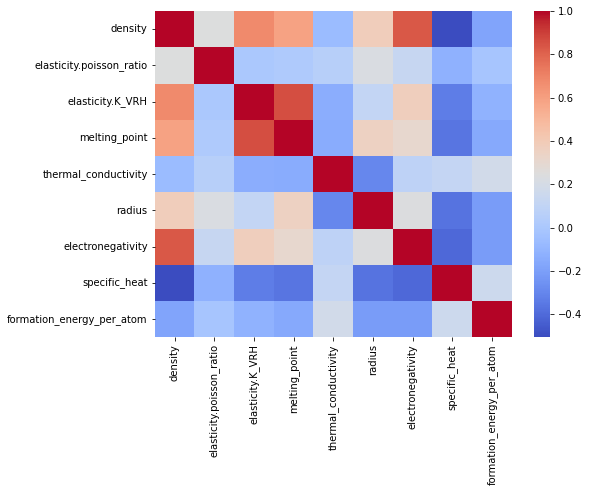

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(tc,cmap='coolwarm')
#plt.savefig('heat1.jpg',bbox_inches='tight')

In [38]:
# as we can see that elasticity and melting point are highly correlated,
# also density and electronegativity are highly correlated
# we remove poisson ratio, melting point and electronegativity data

In [39]:
X1=X[['density','elasticity.K_VRH','thermal_conductivity','radius','specific_heat','formation_energy_per_atom',]]

In [40]:
X1.head()

,density,elasticity.K_VRH,thermal_conductivity,radius,specific_heat,formation_energy_per_atom
0,16.386167,179,47.500000,1.9250,0.139500,-1.146823
1,8.618942,222,91.750000,1.5325,0.454250,-0.013727
2,7.301686,129,358.750000,1.3825,0.513750,-0.181494
3,11.233434,105,71.500000,1.7500,0.267000,-0.199346
4,11.755995,109,55.333333,1.8600,0.226667,-0.177786


In [41]:
vif_data2=pd.DataFrame()

In [42]:
vif_data2['feature']=X1.columns

In [43]:
vif_data2['VIF']=[variance_inflation_factor(X1.values,i) for i in range(len(X1.columns))]

In [44]:
vif_data2

,feature,VIF
0,density,14.216038
1,elasticity.K_VRH,7.539839
2,thermal_conductivity,3.097705
3,radius,14.413554
4,specific_heat,2.482142
5,formation_energy_per_atom,3.171485


In [45]:
tc2=X1.corr()

<AxesSubplot:>

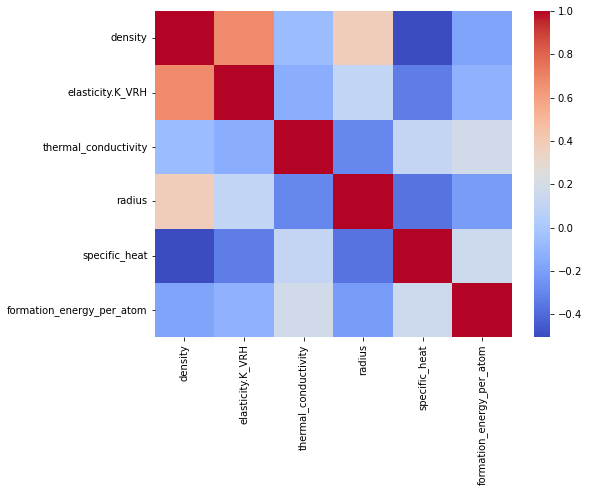

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(tc2,cmap='coolwarm')
#plt.savefig('heat2.jpg',bbox_inches='tight')

In [46]:
X2=df[['density','elasticity.K_VRH','thermal_conductivity','radius','specific_heat','formation_energy_per_atom',]]

In [47]:
X2.head()

,density,elasticity.K_VRH,thermal_conductivity,radius,specific_heat,formation_energy_per_atom
0,16.386167,179,47.500000,1.9250,0.139500,-1.146823
1,8.618942,222,91.750000,1.5325,0.454250,-0.013727
2,7.301686,129,358.750000,1.3825,0.513750,-0.181494
3,11.233434,105,71.500000,1.7500,0.267000,-0.199346
4,11.755995,109,55.333333,1.8600,0.226667,-0.177786


In [48]:
y2=df[['C11','C22','C33','C12','C13','C23','C44','C55','C66']]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3,random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=MinMaxScaler()

In [53]:
X_train=scaler.fit_transform(X_train)

In [54]:
X_test=scaler.transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=20)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [58]:
rfc_pred=rfc.predict(X_test)

In [59]:
from sklearn import metrics

In [60]:
print(metrics.mean_absolute_error(y_test,rfc_pred))

25.852332852332854


In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfc_pred)))

38.571117701346445


In [62]:
print(metrics.explained_variance_score(y_test,rfc_pred))

0.7449151639097256


In [66]:
print(metrics.r2_score(y_test,rfc_pred))

0.7428602835399053


In [64]:
y2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
C11,767.0,203.211213,126.538262,3.0,103.5,180.0,274.0,622.0
C22,767.0,203.860495,127.183684,3.0,103.5,179.0,283.0,622.0
C33,767.0,208.787484,133.449438,5.0,110.5,184.0,284.0,717.0
C12,767.0,96.379400,56.865842,1.0,49.0,87.0,138.0,251.0
C13,767.0,94.132986,55.480861,3.0,46.0,88.0,138.0,251.0
C23,767.0,93.411995,54.033905,0.0,47.0,89.0,135.5,251.0
C44,767.0,65.375489,43.970882,0.0,34.0,57.0,85.5,259.0
C55,767.0,67.285528,44.602838,0.0,34.0,60.0,88.0,259.0
C66,767.0,65.250326,47.096700,0.0,29.5,53.0,90.0,259.0
